In [31]:
import pandas as pd
import numpy as np
import seaborn as sns  # 데이터 시각화 API
import matplotlib.pyplot as plt  # 데이터 시각화 API
%matplotlib inline

In [2]:
pd.__version__

'1.1.3'

In [25]:
np.__version__

'1.19.2'

In [29]:
sns.__version__

'0.11.0'

### [pandas.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas-to-datetime)
* 기존 'HIREDATE' 컬럼의 mm-dd-yyyy 형식을 yyyy-mm-dd 형식으로 변경함.

In [52]:
emp_df = pd.read_csv(r'0.dataSet/empAll.csv')
emp_df['HIREDATE'] = pd.to_datetime(emp_df['HIREDATE'])
print(type(emp_df))
emp_df.head(20)

<class 'pandas.core.frame.DataFrame'>


,EMPNO,ENAME,JOB,MGR,HIREDATE,SAL,COMM,DEPTNO
0,7369,SMITH,CLERK,7902.0,1980-12-17,800,NaN,20
1,7499,ALLEN,SALESMAN,7698.0,1981-02-20,1600,300.0,30
2,7521,WARD,SALESMAN,7698.0,1981-02-22,1250,500.0,30
3,7566,JONES,MANAGER,7839.0,1981-04-02,2975,NaN,20
4,7654,MARTIN,SALESMAN,7698.0,1981-09-28,1250,1400.0,30
5,7698,BLAKE,MANAGER,7839.0,1981-05-01,2850,NaN,30
6,7839,KING,PRESIDENT,NaN,1981-11-17,5000,NaN,10
7,7844,TURNER,SALESMAN,7698.0,1981-09-08,1500,0.0,30
8,7900,JAMES,CLERK,7698.0,1981-12-03,950,NaN,30
9,7902,FORD,ANALYST,7566.0,1981-12-03,3000,NaN,20


In [53]:
# 'SAL'이 가장 많은 상위 3명을 추출 후
emp_df.sort_values(['SAL'], ascending=False).head(3)

,EMPNO,ENAME,JOB,MGR,HIREDATE,SAL,COMM,DEPTNO
6,7839,KING,PRESIDENT,NaN,1981-11-17,5000,NaN,10
9,7902,FORD,ANALYST,7566.0,1981-12-03,3000,NaN,20
3,7566,JONES,MANAGER,7839.0,1981-04-02,2975,NaN,20


In [54]:
# 'SAL'이 가장 적은 하위 3명을 추출 후 반환
emp_df.sort_values(['SAL'], ascending=False).tail(3)

,EMPNO,ENAME,JOB,MGR,HIREDATE,SAL,COMM,DEPTNO
4,7654,MARTIN,SALESMAN,7698.0,1981-09-28,1250,1400.0,30
8,7900,JAMES,CLERK,7698.0,1981-12-03,950,NaN,30
0,7369,SMITH,CLERK,7902.0,1980-12-17,800,NaN,20


* 로딩된 데이터 컬럼의 타입 확인

In [55]:
print('\n ### EMP 데이터 정보 ### \n')
print(emp_df.info())


 ### EMP 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   EMPNO     11 non-null     int64         
 1   ENAME     11 non-null     object        
 2   JOB       11 non-null     object        
 3   MGR       10 non-null     float64       
 4   HIREDATE  11 non-null     datetime64[ns]
 5   SAL       11 non-null     int64         
 6   COMM      4 non-null      float64       
 7   DEPTNO    11 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 832.0+ bytes
None


* 만약 사이킷런(sklearn) 머신러닝을 사용한다면 Null 값을 허용하지 않기 때문에 이를 처리할 필요가 있음.
* DataFrame의 `fillna()` 함수를 사용해 간단하게 평균 또는 고정 값으로 변경할 수 있음.
* 이번 예제에서 MGR 컬럼과 COMM 컬럼의 경우는 'N' 값으로 변경한 후, Null 값의 유무를 확인함.

In [56]:
emp_df['MGR'].fillna('N', inplace=True)
emp_df['COMM'].fillna('N', inplace=True)
print('## Dataset Null 값 갯수: ', emp_df.isnull().sum().sum())

## Dataset Null 값 갯수:  0


* 문자열 Feature인 'JOB' 컬럼의 값 분류를 확인함.

In [23]:
print('"JOB" 값 분포:\n', emp_df['JOB'].value_counts())

"JOB" 값 분포:
 SALESMAN     4
CLERK        3
MANAGER      2
ANALYST      1
PRESIDENT    1
Name: JOB, dtype: int64


* 부서별(DEPTNO)에 따른 직업(JOB)의 분포를 확인함.

In [57]:
emp_df.groupby(['JOB', 'DEPTNO'])['DEPTNO'].count()

JOB        DEPTNO
ANALYST    20        1
CLERK      10        1
           20        1
           30        1
MANAGER    20        1
           30        1
PRESIDENT  10        1
SALESMAN   30        4
Name: DEPTNO, dtype: int64

<AxesSubplot:xlabel='JOB', ylabel='DEPTNO'>

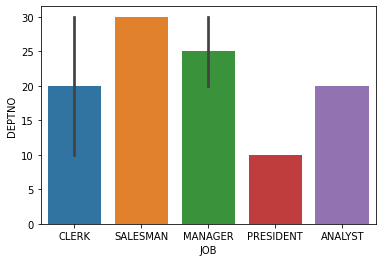

In [58]:
sns.barplot(x='JOB', y='DEPTNO', data=emp_df)

* 급여(SAL)의 분포를 확인함.

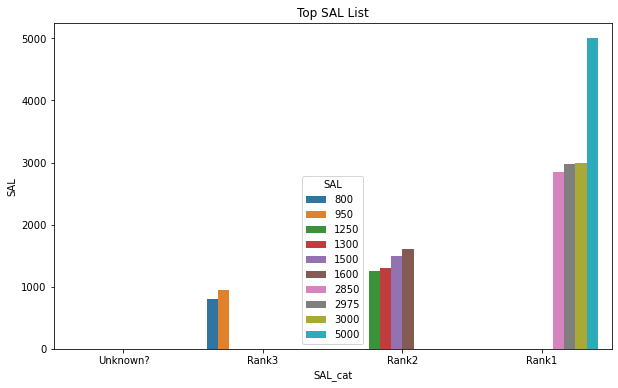

In [75]:
# 입력 sal에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용됨.
def get_category(sal):
    cat = ''
    if sal <= -1: cat = 'Unknown?'
    elif sal <= 1000: cat = 'Rank3'
    elif sal <= 2000: cat = 'Rank2'
    else: cat = 'Rank1'
        
    return cat

# 막대그래프의 크기 figure를 보다 크게 설정함.
plt.figure(figsize=(10,6))
plt.title('Top SAL(salary) List')

# X 축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown?', 'Rank3', 'Rank2', 'Rank1']

# lambda 식에 앞서 생성한 get_category() 함수를 반환값으로 지정함.
# get_category(X)는 입력값으로 'SAL' 컬럼 값
emp_df['SAL_cat'] = emp_df['SAL'].apply(lambda x : get_category(x))
sns.barplot(x='SAL_cat', y='SAL', hue='SAL', data=emp_df, order=group_names)
emp_df.drop('SAL_cat', axis=1, inplace=True)

### [pandas.Series.map](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html?highlight=map#pandas-series-map)
* 특정 Key값을 여러 값으로 치환

In [35]:
# 1_numpy.where()
np.where(emp_df['DEPTNO'] == 10, '총무부',
         np.where(emp_df['DEPTNO'] == 20, '경리부', '인사부'))

array(['경리부', '인사부', '인사부', '경리부', '인사부', '인사부', '총무부', '인사부', '인사부',
       '경리부', '총무부'], dtype='<U3')

In [36]:
# 2_dictionary + map
dict_deptno = { 10: '총무부', 20: '경리부', 30: '인사부' }
emp_df['DEPTNO'].map(dict_deptno)  # Dictionary의 key값으로 전달 후 value 출력

0     경리부
1     인사부
2     인사부
3     경리부
4     인사부
5     인사부
6     총무부
7     인사부
8     인사부
9     경리부
10    총무부
Name: DEPTNO, dtype: object

In [37]:
# 3_pandas.replace()
emp_df['DEPTNO'].replace(dict_deptno)

0     경리부
1     인사부
2     인사부
3     경리부
4     인사부
5     인사부
6     총무부
7     인사부
8     인사부
9     경리부
10    총무부
Name: DEPTNO, dtype: object

### [pandas.cut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html?highlight=cut#pandas-cut)
```python
pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise', ordered=True)
```
> **x**: array data  
> **bins**: 최소・최댓값  
> **right**: 범위의 최댓값 개방 여부(True: 초과 ~ 이하, False: 이상 ~ 미만)  
> **labels**: 그룹 이름 지정  
> **precision**: 라벨이 없는 경우의 정밀도(소수점 갯수)  

In [38]:
emp_df['SAL']

0      800
1     1600
2     1250
3     2975
4     1250
5     2850
6     5000
7     1500
8      950
9     3000
10    1300
Name: SAL, dtype: int64

In [39]:
# 1_numpy.where()
np.where(emp_df['SAL'] <= 1000, '3등급',
        np.where(emp_df['SAL'] <= 2000, '2등급', '1등급'))

array(['3등급', '2등급', '2등급', '1등급', '2등급', '1등급', '1등급', '2등급', '3등급',
       '1등급', '2등급'], dtype='<U3')

In [40]:
# 2_pandas.cut()
pd.cut(emp_df['SAL'], [0, 1000, 2000, 9999])

0        (0, 1000]
1     (1000, 2000]
2     (1000, 2000]
3     (2000, 9999]
4     (1000, 2000]
5     (2000, 9999]
6     (2000, 9999]
7     (1000, 2000]
8        (0, 1000]
9     (2000, 9999]
10    (1000, 2000]
Name: SAL, dtype: category
Categories (3, interval[int64]): [(0, 1000] < (1000, 2000] < (2000, 9999]]

In [41]:
pd.cut(emp_df['SAL'], [0, 1000, 2000, 9999], right=False, labels=['3등급', '2등급', '1등급'])

0     3등급
1     2등급
2     2등급
3     1등급
4     2등급
5     1등급
6     1등급
7     2등급
8     3등급
9     1등급
10    2등급
Name: SAL, dtype: category
Categories (3, object): ['3등급' < '2등급' < '1등급']

* **codes**: 각 그룹 순서 확인  
* **categories**: 각 그룹 이름 확인  
* **value_counts()**: 각 그룹 데이터 수

In [42]:
emp_sal = pd.cut(np.array(emp_df['SAL']), [0, 1000, 2000, 9999], labels=['3등급', '2등급', '1등급'])
print(emp_sal.codes)
print('=' * 10)
print(emp_sal.categories)
print('=' * 10)
print(pd.value_counts(emp_sal))

[0 1 1 2 1 2 2 1 0 2 1]
Index(['3등급', '2등급', '1등급'], dtype='object')
2등급    5
1등급    4
3등급    2
dtype: int64


In [43]:
emp_med_sal = pd.cut(np.array(emp_df['SAL']), 4)  # 범위가 균등한 그룹 갯수 지정
pd.value_counts(emp_med_sal)

(795.8, 1850.0]     7
(2900.0, 3950.0]    2
(3950.0, 5000.0]    1
(1850.0, 2900.0]    1
dtype: int64